In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

# Data Prep

In [3]:
data = pd.read_csv("merge_2.csv")
cols = [
    "SentiDate",
    "LiAdj Close",
    "ALBAdj Close",
    "ALBVolume",
    "LiVolume",
    "Sentiscore",
]
data.dropna(inplace=True, subset=cols)
data = data[cols]
data = data.rename(
    columns={"LiAdj Close": "LiAdj_Close", "ALBAdj Close": "ALBAdj_Close"}
)
data.head()

,SentiDate,LiAdj_Close,ALBAdj_Close,ALBVolume,LiVolume,Sentiscore
0,05-03-2024,0.001362,109.400002,19322400,1155143,-0.307199
1,04-03-2024,0.001571,133.199997,4216900,1262621,-0.122088
2,01-03-2024,0.001698,142.800003,3279700,1127246,-0.235303
3,29-02-2024,0.001743,137.850006,4563000,1815600,0.337832
4,28-02-2024,0.001608,132.059998,2733100,2514223,0.887329


In [4]:
data["SentiDate"] = pd.to_datetime(data["SentiDate"], format="%d-%m-%Y")
data = data.sort_values(by="SentiDate")
scaler = StandardScaler()
cols = ["LiAdj_Close", "ALBAdj_Close", "ALBVolume", "LiVolume", "Sentiscore"]
data[cols] = scaler.fit_transform(data[cols])
data.head()

,SentiDate,LiAdj_Close,ALBAdj_Close,ALBVolume,LiVolume,Sentiscore
124,2023-08-21,-0.942132,2.043038,-0.642018,-0.526341,1.246508
123,2023-08-22,-0.747745,2.046856,-0.598374,-0.186436,-0.377886
122,2023-08-23,-0.824928,2.200401,-0.957177,-0.290529,1.333203
121,2023-08-24,-0.870666,2.156288,-0.908630,-0.528233,-0.240508
120,2023-08-25,-0.899253,2.113872,-0.655723,-0.534999,1.430449


<Axes: xlabel='SentiDate'>

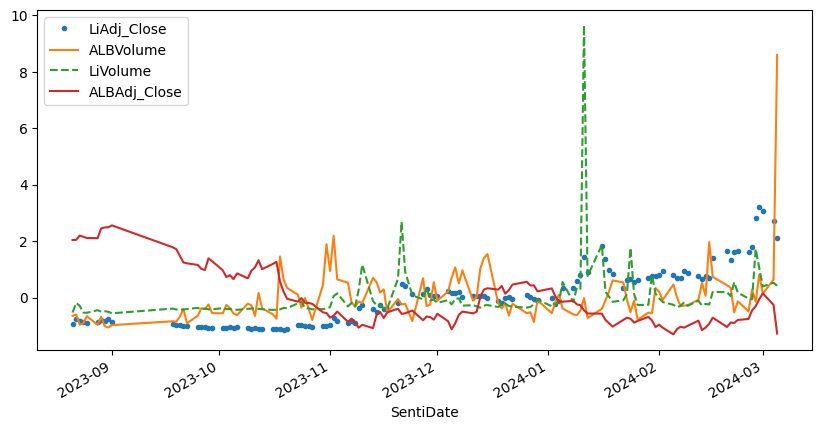

In [5]:
data.plot(
    x="SentiDate",
    y=["LiAdj_Close", "ALBVolume", "LiVolume", "ALBAdj_Close"],
    style=[".", "-", "--", "-"],
    figsize=(10, 5),
)

<Axes: xlabel='SentiDate'>

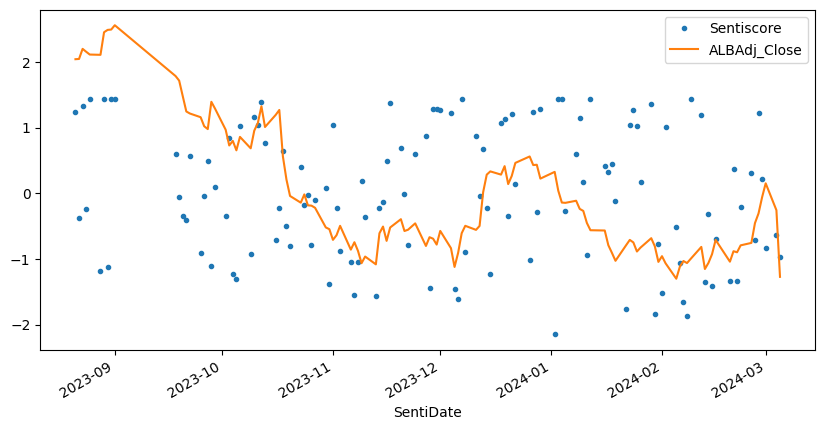

In [6]:
data.plot(
    x="SentiDate", 
    y=["Sentiscore", "ALBAdj_Close"], 
    style=[".", "-"], 
    figsize=(10, 5)
)

# Polynomial Regression

## Without Sentiment

In [7]:
poly = PolynomialFeatures(degree=2)

In [8]:
cols = ["SentiDate", "LiAdj_Close", "ALBVolume", "LiVolume"]
X_without_senti = data[cols]
y_without_senti = data["ALBAdj_Close"]

In [9]:
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(
    X_without_senti, y_without_senti, test_size=0.3, shuffle=False, random_state=1
) 

train_cols = ["LiAdj_Close", "ALBVolume", "LiVolume"]

X_train_poly = poly.fit_transform(X_train[train_cols])
X_test_poly = poly.fit_transform(X_test[train_cols])

In [10]:
import statsmodels
import statsmodels.api as sm

model = sm.OLS(y_train, X_train_poly).fit()
y_pred = model.predict(X_test_poly)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ALBAdj_Close   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     24.17
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           3.74e-19
Time:                        20:45:59   Log-Likelihood:                -66.991
No. Observations:                  88   AIC:                             154.0
Df Residuals:                      78   BIC:                             178.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5022      0.119     -4.222      0.000      -0.739      -0.265
x1            -0.3725      0.441     -0.845      0.401      -1.250       0.505
x2            -0.6859      0.208     -3.299      0.001      -1.100      -0.272
x3            -0.7483      0.364     -2.056      0.043      -1.473      -0.024
x4            -0.3430      0.563     -0.609      0.544      -1.465       0.779
x5             0.4829      0.211      2.290      0.025       0.063       0.903
x6             1.1568      0.817      1.416      0.161      -0.470       2.784
x7             0.5290      0.111      4.750      0.000       0.307       0.751
x8             0.0285      0.594      0.048      0.962      -1.154       1.211
x9             0.1138      0.249      0.457      0.649      -0.382       0.609
==============================================================================
Omnibus:                        8.778   Durbin-Watson:                   1.213
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               11.314
Skew:                          -0.461   Prob(JB):                      0.00349
Kurtosis:                       4.495   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# plot_data = pd.DataFrame({
#     "SentiDate": X_test["SentiDate"],
#     "y_test": y_test,
#     "y_pred": y_pred,
# })

In [12]:
# plot_data = plot_data.sort_values(by="SentiDate")
# plot_data.plot(x="SentiDate", y="y_pred", style=".", figsize=(10, 5))

In [13]:
# plt.scatter(plot_data["SentiDate"], plot_data["y_pred"], vmax=25, c="blue")
# plt.plot(plot_data["SentiDate"], plot_data["y_test"], color="red")
# plt.ylim(-2, 3)

## With Sentiment

In [14]:
X_with_senti = data[cols + ["Sentiscore"]]
y_with_senti = data["ALBAdj_Close"]

In [15]:
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(
    X_with_senti, y_with_senti, test_size=0.3, shuffle=False, random_state=1
)

train_cols = ["LiAdj_Close", "ALBVolume", "LiVolume", "Sentiscore"]

X_train_poly = poly.fit_transform(X_train[train_cols])
X_test_poly = poly.fit_transform(X_test[train_cols])

In [16]:
model_s = sm.OLS(y_train, X_train_poly).fit()
y_pred = model_s.predict(X_test_poly)

model_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ALBAdj_Close   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     16.83
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.65e-17
Time:                        20:46:08   Log-Likelihood:                -62.172
No. Observations:                  88   AIC:                             154.3
Df Residuals:                      73   BIC:                             191.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5849      0.157     -3.735      0.000      -0.897      -0.273
x1            -0.4083      0.436     -0.937      0.352      -1.276       0.460
x2            -0.7037      0.205     -3.429      0.001      -1.113      -0.295
x3            -0.7896      0.380     -2.078      0.041      -1.547      -0.032
x4             0.0118      0.100      0.117      0.907      -0.188       0.212
x5            -0.1950      0.564     -0.346      0.730      -1.319       0.929
x6             0.5312      0.216      2.454      0.017       0.100       0.963
x7             0.7284      0.835      0.872      0.386      -0.936       2.393
x8            -0.2151      0.159     -1.356      0.179      -0.531       0.101
x9             0.5830      0.119      4.913      0.000       0.346       0.819
x10           -0.2056      0.608     -0.338      0.736      -1.418       1.007
x11            0.1180      0.105      1.127      0.263      -0.091       0.327
x12            0.1838      0.254      0.723      0.472      -0.323       0.691
x13           -0.1074      0.371     -0.290      0.773      -0.847       0.632
x14            0.0412      0.075      0.548      0.585      -0.108       0.191
==============================================================================
Omnibus:                       10.409   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.260
Skew:                          -0.527   Prob(JB):                     0.000801
Kurtosis:                       4.667   Cond. No.                         32.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""